In [1]:
# importo libreria

import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12988\2622726051.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
banco = pd.read_csv("banco.csv", sep= ";")
banco.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
23175,23176,34,management,casado,secundaria/superiores,no,56,si,no,movil,311,20-nov-2021,3,183,1,sin_exito,no
30401,30402,24,admin.,soltero,universitarios,no,0,si,no,movil,89,7-sep-2021,1,103,2,exito,no
31255,31256,25,services,soltero,secundaria/superiores,no,-141,si,no,movil,113,18-may-2021,2,348,2,sin_exito,no
8089,8090,32,management,soltero,universitarios,no,522,no,no,movil,576,22-aug-2021,2,-1,0,NaN,si
41985,41986,45,services,casado,secundaria/superiores,no,759,si,no,NaN,172,2-jun-2021,2,-1,0,NaN,no


In [3]:
#tratamos tema de nulos y duplicados
print(f"Hay un total de {banco.duplicated().sum()} duplicados")
print(f"Hay un total de {banco.isnull().sum().sum()} valores nulos")
banco.isnull().sum()
banco['tipo_contacto'].fillna('Sin especificar', inplace=True)
banco.drop(columns='resultado_campanas_anteriores',inplace=True)
banco.dropna(inplace=True)
print("\nDespues de eliminar los nulos, las columnas quedan así:")
banco.isnull().sum()

Hay un total de 0 duplicados
Hay un total de 50703 valores nulos

Despues de eliminar los nulos, las columnas quedan así:


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12988\2250227856.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  banco['tipo_contacto'].fillna('Sin especificar', inplace=True)


ID                      0
edad                    0
trabajo                 0
estado_civil            0
educacion               0
deuda                   0
saldo                   0
vivienda                0
prestamo                0
tipo_contacto           0
duracion                0
fecha_contacto          0
campaign                0
tiempo_transcurrido     0
contactos_anteriores    0
target                  0
dtype: int64

In [4]:
#calculamos el total de profesiones que hay (eje Y)

profesion = banco["trabajo"].unique()
profesion

array(['blue-collar', 'services', 'student', 'management', 'admin.',
       'technician', 'self-employed', 'entrepreneur', 'retired',
       'unemployed', 'housemaid', 'unknown'], dtype=object)

In [5]:
#calculamos el numero de personas por profesion
npersonas = banco["trabajo"].value_counts()
npersonas

trabajo
blue-collar      9076
management       9024
technician       7199
admin.           4910
services         3913
retired          2102
self-employed    1510
entrepreneur     1376
unemployed       1246
housemaid        1172
student           762
unknown           156
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12988\4111680662.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, npersonas[i], str(npersonas[i]), ha='center', va='bottom')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12988\4111680662.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentaje = (npersonas[i] / total_personas) * 100
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12988\4111680662.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by

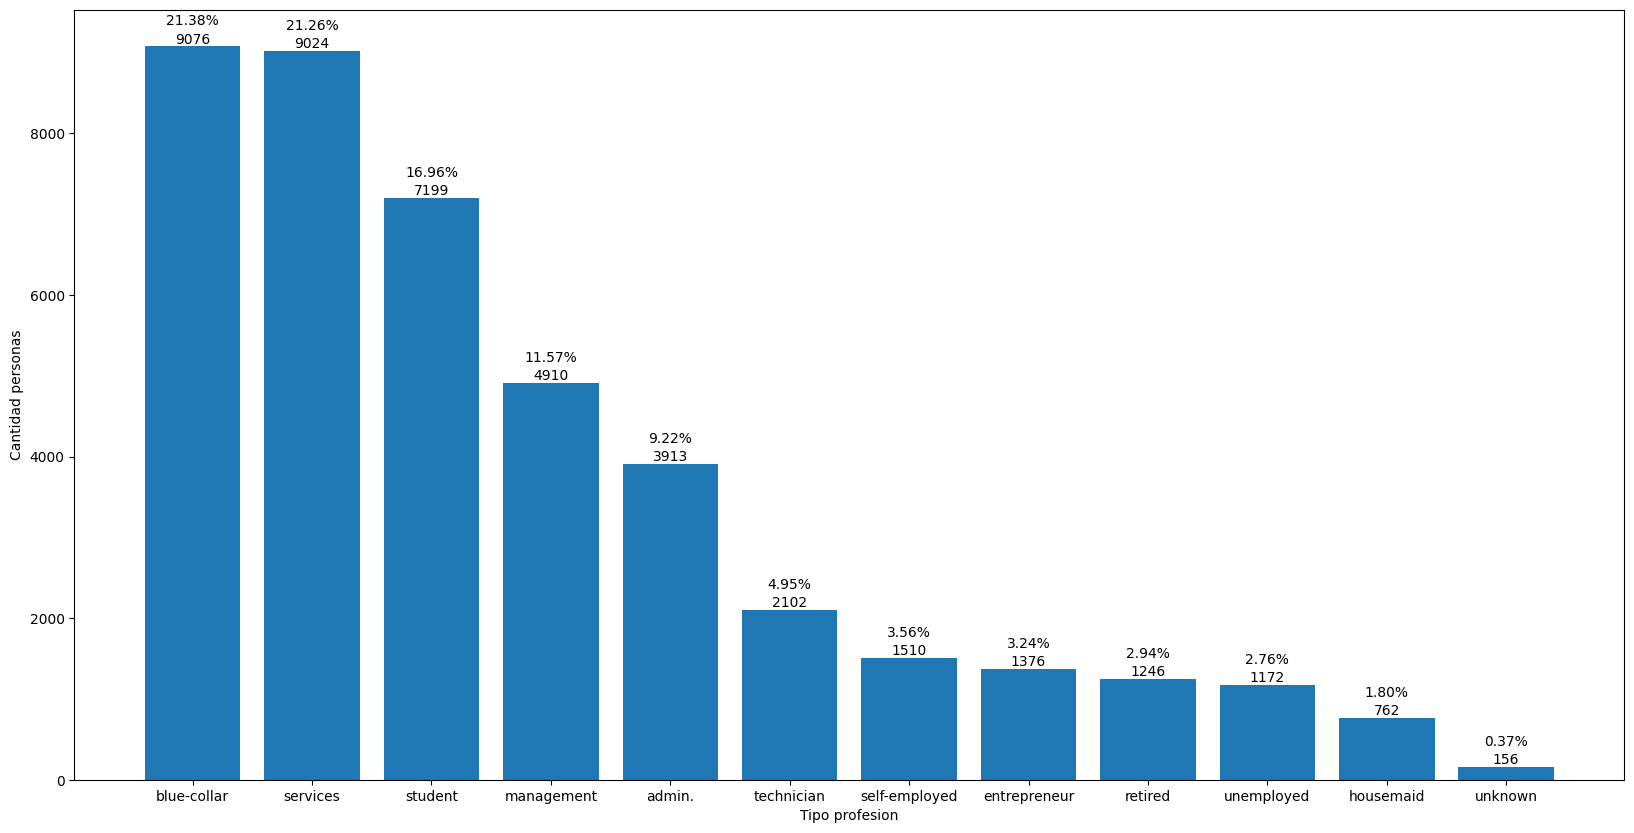

In [6]:

plt.figure(figsize = [20,10])

plt.ylabel("Cantidad personas")
plt.xlabel("Tipo profesion")

# total personas por barra
for i in range(len(profesion)):
    plt.text(i, npersonas[i], str(npersonas[i]), ha='center', va='bottom')

#% de personas
total_personas = sum(npersonas)
for i in range(len(profesion)):
    porcentaje = (npersonas[i] / total_personas) * 100
    plt.text(i, npersonas[i]+400, f'{porcentaje:.2f}%', ha='center', va='top')

plt.bar(profesion,npersonas)

plt.show()

In [7]:
estado = banco["estado_civil"].value_counts()
estado 

estado_civil
casado        25517
soltero       11991
divorciado     4938
Name: count, dtype: int64

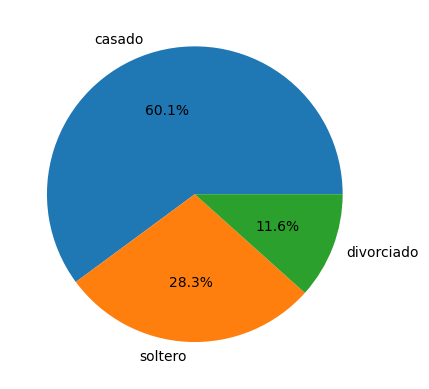

In [8]:
import matplotlib.pyplot as plt

civil = ["casado", "soltero", "divorciado"]
personas = [25517, 11991, 4938]

plt.pie(personas, labels=civil, autopct='%1.1f%%')
plt.show()


In [9]:
banco.columns

Index(['ID', 'edad', 'trabajo', 'estado_civil', 'educacion', 'deuda', 'saldo',
       'vivienda', 'prestamo', 'tipo_contacto', 'duracion', 'fecha_contacto',
       'campaign', 'tiempo_transcurrido', 'contactos_anteriores', 'target'],
      dtype='object')

In [49]:
personas = banco.groupby("vivienda")["estado_civil"].value_counts()
print(personas)

vivienda  estado_civil
no        casado          11029
          soltero          5442
          divorciado       2169
si        casado          14488
          soltero          6549
          divorciado       2769
Name: count, dtype: int64


In [77]:
casa = banco["vivienda"].unique()
print(casa,cantidad_segun_escivil)

cantidad_segun_escivil = banco["estado_civil"].unique()
cantidad_segun_escivil

nºpersonas = banco["estado_civil"].value_counts()
print(nºpersonas)


['si' 'no'] ['casado' 'soltero' 'divorciado']
estado_civil
casado        25517
soltero       11991
divorciado     4938
Name: count, dtype: int64


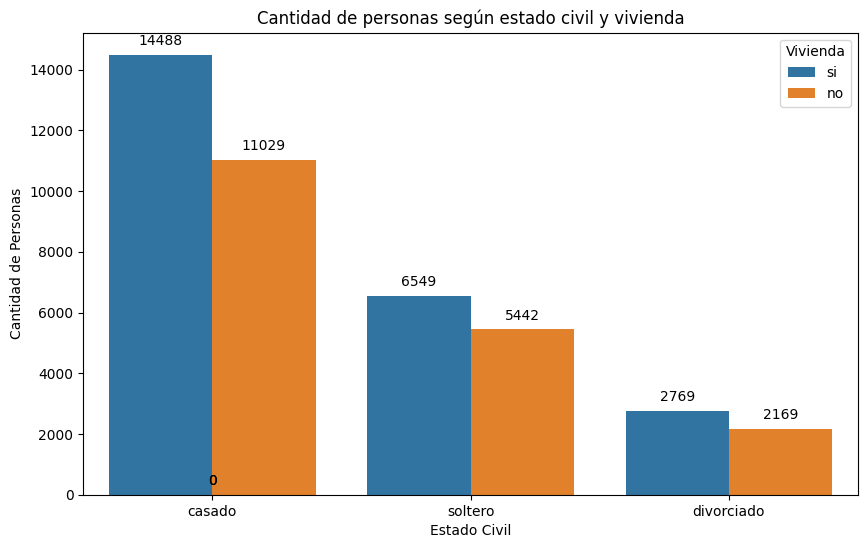

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
ax = sns.countplot(data=banco, x='estado_civil', hue='vivienda')

# Añadir el número de personas en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Cantidad de personas según estado civil y vivienda')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Vivienda', loc='upper right')
plt.show()

